In [1]:
#PART 1
#EXPLANATION OF 5 TYPES OF MACHINE LEARNING MODELS
#1. GENERAL IDEA
#2. OBJECTIVE FUNCTION
#3. ALGORITHM FITTING PROCESS
#4. PROS AND CONS OF THE SELECTED ALGORITHM

#PART 2 
#PRACTICAL DEMONSTRATION
#1. CROSS VALIDATION METHOD
#2. EVALUATION METRIC
#3. HYPERPARAMETER TUNING
#4. VARIABLE SELECTION
#5. RESAMPLING METHOD


# 5 MACHINE LEARNING MODELS SELECTED ARE
# 1. RANDOM FOREST  //
# 2. NAIVE BAYES
# 3. LOGISTIC REGRESSION
# 4. DECISION TREE
# 5. LINEAR REGRESSION

In [132]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

R.version.string

#Install missing packages
 install.packages("ISLR")
 install.packages("woeBinning")

#libraries for random forest
library(randomForest)
library(caret)
library(e1071)
library(ROCR)

library(woeBinning)  # Bin numerical and categorical variables

install.packages("dummies")
library(dummies)

[1] "R version 3.6.0 (2019-04-26)"

Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'ISLR' is in use and will not be installed"Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'woeBinning' is in use and will not be installed"Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'dummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kgupta\AppData\Local\Temp\RtmpO0gvCt\downloaded_packages


dummies-1.5.6 provided by Decision Patterns



In [133]:
install.packages("olsrr")
library(olsrr)

Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'olsrr' is in use and will not be installed"

In [134]:
install.packages("kernlab")
library(kernlab)

Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'kernlab' is in use and will not be installed"

In [191]:
install.packages("xgboost")
library(xgboost)

Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
         binary  source needs_compilation
xgboost 1.0.0.1 1.0.0.2              TRUE

  Binaries will be installed
package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kgupta\AppData\Local\Temp\RtmpO0gvCt\downloaded_packages


Warning message:
"package 'xgboost' was built under R version 3.6.3"

IMPORTING AND USE OF DATA

In [135]:
# Import  Bank Marketing train data
train <- read.csv("C:/Users/kgupta/Desktop/STATISTICAL MARKETING/mbd2019-in-class-competition-bank-mkt/bank_mkt_train.csv", row.names=1)
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
2,29,housemaid,single,high.school,no,no,no,telephone,may,mon,3,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
3,39,unemployed,married,basic.9y,unknown,yes,no,telephone,jun,fri,6,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,49,blue-collar,married,basic.6y,unknown,no,no,cellular,nov,tue,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
5,32,self-employed,single,university.degree,no,yes,no,cellular,may,mon,3,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0
6,29,admin.,single,high.school,unknown,yes,no,cellular,jul,fri,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
7,51,self-employed,married,university.degree,unknown,yes,no,telephone,jun,tue,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
8,34,blue-collar,married,basic.4y,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
9,52,services,married,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
14,52,admin.,married,university.degree,no,yes,no,cellular,nov,thu,3,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0
15,29,admin.,single,university.degree,no,yes,no,cellular,jun,mon,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,0


In [136]:
# Import  Bank Marketing test data
test <- read.csv("C:/Users/kgupta/Desktop/STATISTICAL MARKETING/mbd2019-in-class-competition-bank-mkt/bank_mkt_test.csv", row.names=1)
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1,33,technician,single,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
10,45,services,married,high.school,unknown,yes,no,cellular,aug,thu,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
11,33,technician,single,professional.course,no,yes,no,telephone,mar,tue,2,999,0,nonexistent,-1.8,93.369,-34.8,0.646,5008.7
12,38,blue-collar,married,basic.9y,unknown,no,no,telephone,jul,wed,3,999,0,nonexistent,1.4,93.918,-42.7,4.956,5228.1
13,30,technician,single,university.degree,no,no,no,telephone,may,thu,5,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
17,33,blue-collar,married,basic.9y,no,yes,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
20,37,blue-collar,divorced,professional.course,no,yes,no,cellular,nov,thu,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
23,50,management,married,university.degree,no,no,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
25,43,blue-collar,married,basic.9y,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8
28,37,admin.,married,university.degree,no,no,no,telephone,jun,mon,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1


Let's Begin with Cleaning the data 

In [137]:
# Some basic encoding for several variables in the train dataset
library(plyr)
train$default <- revalue(train$default,
               c("no"="1", "unknown"="2","yes"="3"))
train$housing <- revalue(train$housing,
               c("no"="1","unknown"="2","yes"="3"))
train$loan <- revalue(train$loan,
               c("no"="1", "unknown"="2","yes"="3"))
train$contact <- revalue(train$contact,
               c("telephone"="1", "cellular"
                 ="2"))
train$poutcome <- revalue(train$poutcome,
               c("failure"="1", "success"="2","nonexistent"="3"))
train$marital <- revalue(train$marital,
               c("single"="1", "married"="2","divorced"="3","unknown"="4"))
train$day_of_week <- revalue(train$day_of_week,
               c("mon"="1", "tue"="2","wed"="3","thu"="4","fri"="5","sat"="6","sun"="7"))
train$education <- revalue(train$education,
               c("high.school"="1", "basic.9y"="2","basic.6y"="3","university.degree"="4","basic.4y"="5","professional.course"="6","illiterate"="7","unknown"="8"))
train$month <- revalue(train$month,
               c("jan"="1", "feb"="2","mar"="3","apr"="4","may"="5","jun"="6","jul"="7","aug"="8","sep"="9","oct"="10","nov"="11","dec"="12"))
train$job <- revalue(train$job,
               c("technician"="1", "services"="2","blue-collar"="3","management"="4","admin."="5","entrepreneur"="6","retired"="7","student"="8","housemaid"="9","unknown"="10","unemployed"="11","self-employed"="12"))

The following `from` values were not present in `x`: yes
The following `from` values were not present in `x`: sat, sun
The following `from` values were not present in `x`: jan, feb


In [138]:
# Checking the train dataset after encoding
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
2,29,9,1,1,1,1,1,1,5,1,3,999,0,3,1.1,93.994,-36.4,4.858,5191.0,0
3,39,11,2,2,2,3,1,1,6,5,6,999,0,3,1.4,94.465,-41.8,4.959,5228.1,0
4,49,3,2,3,2,1,1,2,11,2,2,999,0,3,-0.1,93.200,-42.0,4.153,5195.8,0
5,32,12,1,4,1,3,1,2,5,1,3,999,1,1,-1.8,92.893,-46.2,1.299,5099.1,0
6,29,5,1,1,2,3,1,2,7,5,2,999,0,3,1.4,93.918,-42.7,4.963,5228.1,0
7,51,12,2,4,2,3,1,1,6,2,1,999,0,3,1.4,94.465,-41.8,4.864,5228.1,0
8,34,3,2,5,1,3,1,2,11,2,1,999,0,3,-0.1,93.200,-42.0,4.153,5195.8,0
9,52,2,2,1,1,3,1,2,11,2,1,999,0,3,-0.1,93.200,-42.0,4.153,5195.8,0
14,52,5,2,4,1,3,1,2,11,4,3,999,0,3,-0.1,93.200,-42.0,4.076,5195.8,0
15,29,5,1,4,1,3,1,2,6,1,1,999,0,3,-2.9,92.963,-40.8,1.266,5076.2,0


In [139]:
# Some basic encoding for several variables in the test dataset
library(plyr)
test$default <- revalue(test$default,
               c("no"="1", "unknown"="2","yes"="3"))
test$housing <- revalue(test$housing,
               c("no"="1","unknown"="2","yes"="3"))
test$loan <- revalue(test$loan,
               c("no"="1", "unknown"="2","yes"="3"))
test$contact <- revalue(test$contact,
               c("telephone"="1", "cellular"="2"))
test$poutcome <- revalue(test$poutcome,
               c("failure"="1", "success"="2","nonexistent"="3"))
test$marital <- revalue(test$marital,
               c("single"="1", "married"="2","divorced"="3","unknown"="4"))
test$day_of_week <- revalue(test$day_of_week,
               c("mon"="1", "tue"="2","wed"="3","thu"="4","fri"="5","sat"="6","sun"="7"))
test$education <- revalue(test$education,
               c("high.school"="1", "basic.9y"="2","basic.6y"="3","university.degree"="4","basic.4y"="5","professional.course"="6","illiterate"="7","unknown"="8"))
test$month <- revalue(test$month,
               c("jan"="1", "feb"="2","mar"="3","apr"="4","may"="5","jun"="6","jul"="7","aug"="8","sep"="9","oct"="10","nov"="11","dec"="12"))
test$job <- revalue(test$job,
               c("technician"="1", "services"="2","blue-collar"="3","management"="4","admin."="5","entrepreneur"="6","retired"="7","student"="8","housemaid"="9","unknown"="10","unemployed"="11","self-employed"="12"))

The following `from` values were not present in `x`: yes
The following `from` values were not present in `x`: sat, sun
The following `from` values were not present in `x`: illiterate
The following `from` values were not present in `x`: jan, feb


In [140]:
# CHECKING THE TEST DATASET AFTER ENCODING

test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1,33,1,1,4,1,1,1,2,11,1,1,999,0,3,-0.1,93.200,-42.0,4.191,5195.8
10,45,2,2,1,2,3,1,2,8,4,3,999,0,3,1.4,93.444,-36.1,4.963,5228.1
11,33,1,1,6,1,3,1,1,3,2,2,999,0,3,-1.8,93.369,-34.8,0.646,5008.7
12,38,3,2,2,2,1,1,1,7,3,3,999,0,3,1.4,93.918,-42.7,4.956,5228.1
13,30,1,1,4,1,1,1,1,5,4,5,999,0,3,1.1,93.994,-36.4,4.860,5191.0
17,33,3,2,2,1,3,1,2,7,2,1,999,0,3,1.4,93.918,-42.7,4.961,5228.1
20,37,3,3,6,1,3,1,2,11,4,1,999,0,3,-0.1,93.200,-42.0,4.076,5195.8
23,50,4,2,4,1,1,1,2,7,4,1,999,0,3,1.4,93.918,-42.7,4.962,5228.1
25,43,3,2,2,1,3,1,2,11,3,1,999,0,3,-0.1,93.200,-42.0,4.120,5195.8
28,37,5,2,4,1,1,1,1,6,1,8,999,0,3,1.4,94.465,-41.8,4.865,5228.1


In [141]:
# Checking the lenght of all columns with yes and no values. the values of default column doesnt match in both train and test set.
length(unique(test$default))
length(unique(test$housing))
length(unique(test$loan))

[1] 2

[1] 3

[1] 3

In [142]:
str(train)
str(test)

'data.frame':	7000 obs. of  20 variables:
 $ age           : int  29 39 49 32 29 51 34 52 52 29 ...
 $ job           : Factor w/ 12 levels "5","3","6","9",..: 4 11 2 7 1 7 2 8 1 1 ...
 $ marital       : Factor w/ 4 levels "3","2","1","4": 3 2 2 3 3 2 2 2 2 3 ...
 $ education     : Factor w/ 8 levels "5","3","2","1",..: 4 3 2 7 4 7 1 4 7 7 ...
 $ default       : Factor w/ 2 levels "1","2": 1 2 2 1 2 2 1 1 1 1 ...
 $ housing       : Factor w/ 3 levels "1","2","3": 1 3 1 3 3 3 3 3 3 3 ...
 $ loan          : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "2","1": 2 2 1 1 1 2 1 1 1 1 ...
 $ month         : Factor w/ 10 levels "4","8","12","7",..: 7 5 8 7 4 5 8 8 8 5 ...
 $ day_of_week   : Factor w/ 5 levels "5","1","4","2",..: 2 1 4 2 1 4 4 4 3 2 ...
 $ campaign      : int  3 6 2 3 2 1 1 1 3 1 ...
 $ pdays         : int  999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : int  0 0 0 1 0 0 0 0 0 0 ...
 $ poutcome      : Factor w/ 3 le

In [143]:
#Checking the number of columns and rows for both train and test set.
ncol(train)
nrow(train)
ncol(test)
nrow(test)

[1] 20

[1] 7000

[1] 19

[1] 3000

In [144]:
#checking for na values in both the sets
count(is.na(train))
count(is.na(test))

x.age,x.job,x.marital,x.education,x.default,x.housing,x.loan,x.contact,x.month,x.day_of_week,...,x.pdays,x.previous,x.poutcome,x.emp.var.rate,x.cons.price.idx,x.cons.conf.idx,x.euribor3m,x.nr.employed,x.subscribe,freq
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,7000


x.age,x.job,x.marital,x.education,x.default,x.housing,x.loan,x.contact,x.month,x.day_of_week,x.campaign,x.pdays,x.previous,x.poutcome,x.emp.var.rate,x.cons.price.idx,x.cons.conf.idx,x.euribor3m,x.nr.employed,freq
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,3000


In [145]:
# Dividing age into several categories for train sets
for(i in 1 : nrow(train)){
  if (train$age[i] <= 19){
    train$age[i] = 'Teenagers'
  } else if (train$age[i] <= 35 & train$age[i] > 19){
    train$age[i] = 'Young Adults'
  } else if (train$age[i] <= 60 & train$age[i] > 35){
    train$age[i] = 'Mature_Adults'
  } else if (train$age[i] > 60){
    train$age[i] = 'Senior Citizens'
  }
  
}
train$age<-as.factor(train$age)



In [146]:
train$age <- revalue(train$age,
               c("Teenagers"="1", "Young Adults"="2","Mature_Adults"="3","Senior Citizens"="4"))

In [147]:
# Dividing age into several categories for test sets
for(i in 1 : nrow(test)){
  if (test$age[i] < 20){
    test$age[i] = 'Teenagers'
  } else if (test$age[i] < 35 & test$age[i] > 19){
    test$age[i] = 'Young Adults'
  } else if (test$age[i] < 60 & test$age[i] > 34){
    test$age[i] = 'Mature_Adults'
  } else if (test$age[i] > 59){
    test$age[i] = 'Senior Citizens'
      
  }
  
}
test$age<-as.factor(test$age)

In [148]:
test$age <- revalue(test$age,
               c("Teenagers"="1", "Young Adults"="2","Mature_Adults"="3","Senior Citizens"="4"))

In [149]:
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
2,2,9,1,1,1,1,1,1,5,1,3,999,0,3,1.1,93.994,-36.4,4.858,5191.0,0
3,3,11,2,2,2,3,1,1,6,5,6,999,0,3,1.4,94.465,-41.8,4.959,5228.1,0
4,3,3,2,3,2,1,1,2,11,2,2,999,0,3,-0.1,93.200,-42.0,4.153,5195.8,0
5,2,12,1,4,1,3,1,2,5,1,3,999,1,1,-1.8,92.893,-46.2,1.299,5099.1,0
6,2,5,1,1,2,3,1,2,7,5,2,999,0,3,1.4,93.918,-42.7,4.963,5228.1,0
7,3,12,2,4,2,3,1,1,6,2,1,999,0,3,1.4,94.465,-41.8,4.864,5228.1,0
8,2,3,2,5,1,3,1,2,11,2,1,999,0,3,-0.1,93.200,-42.0,4.153,5195.8,0
9,3,2,2,1,1,3,1,2,11,2,1,999,0,3,-0.1,93.200,-42.0,4.153,5195.8,0
14,3,5,2,4,1,3,1,2,11,4,3,999,0,3,-0.1,93.200,-42.0,4.076,5195.8,0
15,2,5,1,4,1,3,1,2,6,1,1,999,0,3,-2.9,92.963,-40.8,1.266,5076.2,0


In [150]:
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1,2,1,1,4,1,1,1,2,11,1,1,999,0,3,-0.1,93.200,-42.0,4.191,5195.8
10,3,2,2,1,2,3,1,2,8,4,3,999,0,3,1.4,93.444,-36.1,4.963,5228.1
11,2,1,1,6,1,3,1,1,3,2,2,999,0,3,-1.8,93.369,-34.8,0.646,5008.7
12,3,3,2,2,2,1,1,1,7,3,3,999,0,3,1.4,93.918,-42.7,4.956,5228.1
13,2,1,1,4,1,1,1,1,5,4,5,999,0,3,1.1,93.994,-36.4,4.860,5191.0
17,2,3,2,2,1,3,1,2,7,2,1,999,0,3,1.4,93.918,-42.7,4.961,5228.1
20,3,3,3,6,1,3,1,2,11,4,1,999,0,3,-0.1,93.200,-42.0,4.076,5195.8
23,3,4,2,4,1,1,1,2,7,4,1,999,0,3,1.4,93.918,-42.7,4.962,5228.1
25,3,3,2,2,1,3,1,2,11,3,1,999,0,3,-0.1,93.200,-42.0,4.120,5195.8
28,3,5,2,4,1,1,1,1,6,1,8,999,0,3,1.4,94.465,-41.8,4.865,5228.1


In [151]:
# checking the variable consumer confidence index
min(train$cons.conf.idx)
max(train$cons.conf.idx)
mean(train$cons.conf.idx)

[1] -50.8

[1] -26.9

[1] -40.47276

In [152]:
#checking the variable consumer price index
min(train$cons.price.idx)
max(train$cons.price.idx)
mean(train$cons.price.idx)

[1] 92.201

[1] 94.767

[1] 93.56869

In [153]:
# Add new variable to train and test i.e whether consumer price index is greater or less than the mean value of consumer price index
# Train
train[, 'price_ge_mean'] <- as.integer(train$cons.price.idx > mean(train$cons.price.idx))
# Test
test[, 'price_ge_mean'] <- as.integer(test$cons.price.idx > mean(test$cons.price.idx))
train
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,price_ge_mean
2,2,9,1,1,1,1,1,1,5,1,...,999,0,3,1.1,93.994,-36.4,4.858,5191.0,0,1
3,3,11,2,2,2,3,1,1,6,5,...,999,0,3,1.4,94.465,-41.8,4.959,5228.1,0,1
4,3,3,2,3,2,1,1,2,11,2,...,999,0,3,-0.1,93.200,-42.0,4.153,5195.8,0,0
5,2,12,1,4,1,3,1,2,5,1,...,999,1,1,-1.8,92.893,-46.2,1.299,5099.1,0,0
6,2,5,1,1,2,3,1,2,7,5,...,999,0,3,1.4,93.918,-42.7,4.963,5228.1,0,1
7,3,12,2,4,2,3,1,1,6,2,...,999,0,3,1.4,94.465,-41.8,4.864,5228.1,0,1
8,2,3,2,5,1,3,1,2,11,2,...,999,0,3,-0.1,93.200,-42.0,4.153,5195.8,0,0
9,3,2,2,1,1,3,1,2,11,2,...,999,0,3,-0.1,93.200,-42.0,4.153,5195.8,0,0
14,3,5,2,4,1,3,1,2,11,4,...,999,0,3,-0.1,93.200,-42.0,4.076,5195.8,0,0
15,2,5,1,4,1,3,1,2,6,1,...,999,0,3,-2.9,92.963,-40.8,1.266,5076.2,0,0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,price_ge_mean
1,2,1,1,4,1,1,1,2,11,1,1,999,0,3,-0.1,93.200,-42.0,4.191,5195.8,0
10,3,2,2,1,2,3,1,2,8,4,3,999,0,3,1.4,93.444,-36.1,4.963,5228.1,0
11,2,1,1,6,1,3,1,1,3,2,2,999,0,3,-1.8,93.369,-34.8,0.646,5008.7,0
12,3,3,2,2,2,1,1,1,7,3,3,999,0,3,1.4,93.918,-42.7,4.956,5228.1,1
13,2,1,1,4,1,1,1,1,5,4,5,999,0,3,1.1,93.994,-36.4,4.860,5191.0,1
17,2,3,2,2,1,3,1,2,7,2,1,999,0,3,1.4,93.918,-42.7,4.961,5228.1,1
20,3,3,3,6,1,3,1,2,11,4,1,999,0,3,-0.1,93.200,-42.0,4.076,5195.8,0
23,3,4,2,4,1,1,1,2,7,4,1,999,0,3,1.4,93.918,-42.7,4.962,5228.1,1
25,3,3,2,2,1,3,1,2,11,3,1,999,0,3,-0.1,93.200,-42.0,4.120,5195.8,0
28,3,5,2,4,1,1,1,1,6,1,8,999,0,3,1.4,94.465,-41.8,4.865,5228.1,1


In [154]:
# Add new variable to train and test i.e whether consumer confidence index is greater or less than the mean value of consumer confidence index
# Train
train[, 'confidence_ge_mean'] <- as.integer(train$cons.conf.idx > mean(train$cons.conf.idx))
# Test
test[, 'confidence_ge_mean'] <- as.integer(test$cons.conf.idx > mean(test$cons.conf.idx))
train
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,price_ge_mean,confidence_ge_mean
2,2,9,1,1,1,1,1,1,5,1,...,0,3,1.1,93.994,-36.4,4.858,5191.0,0,1,1
3,3,11,2,2,2,3,1,1,6,5,...,0,3,1.4,94.465,-41.8,4.959,5228.1,0,1,0
4,3,3,2,3,2,1,1,2,11,2,...,0,3,-0.1,93.200,-42.0,4.153,5195.8,0,0,0
5,2,12,1,4,1,3,1,2,5,1,...,1,1,-1.8,92.893,-46.2,1.299,5099.1,0,0,0
6,2,5,1,1,2,3,1,2,7,5,...,0,3,1.4,93.918,-42.7,4.963,5228.1,0,1,0
7,3,12,2,4,2,3,1,1,6,2,...,0,3,1.4,94.465,-41.8,4.864,5228.1,0,1,0
8,2,3,2,5,1,3,1,2,11,2,...,0,3,-0.1,93.200,-42.0,4.153,5195.8,0,0,0
9,3,2,2,1,1,3,1,2,11,2,...,0,3,-0.1,93.200,-42.0,4.153,5195.8,0,0,0
14,3,5,2,4,1,3,1,2,11,4,...,0,3,-0.1,93.200,-42.0,4.076,5195.8,0,0,0
15,2,5,1,4,1,3,1,2,6,1,...,0,3,-2.9,92.963,-40.8,1.266,5076.2,0,0,0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,price_ge_mean,confidence_ge_mean
1,2,1,1,4,1,1,1,2,11,1,...,999,0,3,-0.1,93.200,-42.0,4.191,5195.8,0,0
10,3,2,2,1,2,3,1,2,8,4,...,999,0,3,1.4,93.444,-36.1,4.963,5228.1,0,1
11,2,1,1,6,1,3,1,1,3,2,...,999,0,3,-1.8,93.369,-34.8,0.646,5008.7,0,1
12,3,3,2,2,2,1,1,1,7,3,...,999,0,3,1.4,93.918,-42.7,4.956,5228.1,1,0
13,2,1,1,4,1,1,1,1,5,4,...,999,0,3,1.1,93.994,-36.4,4.860,5191.0,1,1
17,2,3,2,2,1,3,1,2,7,2,...,999,0,3,1.4,93.918,-42.7,4.961,5228.1,1,0
20,3,3,3,6,1,3,1,2,11,4,...,999,0,3,-0.1,93.200,-42.0,4.076,5195.8,0,0
23,3,4,2,4,1,1,1,2,7,4,...,999,0,3,1.4,93.918,-42.7,4.962,5228.1,1,0
25,3,3,2,2,1,3,1,2,11,3,...,999,0,3,-0.1,93.200,-42.0,4.120,5195.8,0,0
28,3,5,2,4,1,1,1,1,6,1,...,999,0,3,1.4,94.465,-41.8,4.865,5228.1,1,0


In [155]:
# Removing unnecessary columns from both train and test dataset
train <- within(train, rm(emp.var.rate, pdays, contact, previous))
test <- within(train, rm(emp.var.rate, pdays, contact, previous))
train
test

Warning message in rm(emp.var.rate, pdays, contact, previous):
"object 'emp.var.rate' not found"Warning message in rm(emp.var.rate, pdays, contact, previous):
"object 'pdays' not found"Warning message in rm(emp.var.rate, pdays, contact, previous):
"object 'contact' not found"Warning message in rm(emp.var.rate, pdays, contact, previous):
"object 'previous' not found"

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,price_ge_mean,confidence_ge_mean
2,2,9,1,1,1,1,1,5,1,3,3,93.994,-36.4,4.858,5191.0,0,1,1
3,3,11,2,2,2,3,1,6,5,6,3,94.465,-41.8,4.959,5228.1,0,1,0
4,3,3,2,3,2,1,1,11,2,2,3,93.200,-42.0,4.153,5195.8,0,0,0
5,2,12,1,4,1,3,1,5,1,3,1,92.893,-46.2,1.299,5099.1,0,0,0
6,2,5,1,1,2,3,1,7,5,2,3,93.918,-42.7,4.963,5228.1,0,1,0
7,3,12,2,4,2,3,1,6,2,1,3,94.465,-41.8,4.864,5228.1,0,1,0
8,2,3,2,5,1,3,1,11,2,1,3,93.200,-42.0,4.153,5195.8,0,0,0
9,3,2,2,1,1,3,1,11,2,1,3,93.200,-42.0,4.153,5195.8,0,0,0
14,3,5,2,4,1,3,1,11,4,3,3,93.200,-42.0,4.076,5195.8,0,0,0
15,2,5,1,4,1,3,1,6,1,1,3,92.963,-40.8,1.266,5076.2,0,0,0


,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,price_ge_mean,confidence_ge_mean
2,2,9,1,1,1,1,1,5,1,3,3,93.994,-36.4,4.858,5191.0,0,1,1
3,3,11,2,2,2,3,1,6,5,6,3,94.465,-41.8,4.959,5228.1,0,1,0
4,3,3,2,3,2,1,1,11,2,2,3,93.200,-42.0,4.153,5195.8,0,0,0
5,2,12,1,4,1,3,1,5,1,3,1,92.893,-46.2,1.299,5099.1,0,0,0
6,2,5,1,1,2,3,1,7,5,2,3,93.918,-42.7,4.963,5228.1,0,1,0
7,3,12,2,4,2,3,1,6,2,1,3,94.465,-41.8,4.864,5228.1,0,1,0
8,2,3,2,5,1,3,1,11,2,1,3,93.200,-42.0,4.153,5195.8,0,0,0
9,3,2,2,1,1,3,1,11,2,1,3,93.200,-42.0,4.153,5195.8,0,0,0
14,3,5,2,4,1,3,1,11,4,3,3,93.200,-42.0,4.076,5195.8,0,0,0
15,2,5,1,4,1,3,1,6,1,1,3,92.963,-40.8,1.266,5076.2,0,0,0


In [156]:
# Grouping 12 categories in the variable job onto 3 groups using WOE
binning_cat <- woe.binning(train, 'subscribe', 'job')
binning_cat

Group.2,Group.1,woe,iv.total.final,1,0,col.perc.a,col.perc.b,iv.bins
3 + 2,3,-46.7406855,0.1562879,170,2039,0.2068127,0.3300421,5.759828e-02
3 + 2,2,-46.7406855,0.1562879,170,2039,0.2068127,0.3300421,5.759828e-02
5 + 4 + 1 + misc. level neg.,5,-0.9402155,0.1562879,455,3452,0.5535280,0.5587569,4.916292e-05
5 + 4 + 1 + misc. level neg.,6,-0.9402155,0.1562879,455,3452,0.5535280,0.5587569,4.916292e-05
5 + 4 + 1 + misc. level neg.,9,-0.9402155,0.1562879,455,3452,0.5535280,0.5587569,4.916292e-05
5 + 4 + 1 + misc. level neg.,4,-0.9402155,0.1562879,455,3452,0.5535280,0.5587569,4.916292e-05
5 + 4 + 1 + misc. level neg.,1,-0.9402155,0.1562879,455,3452,0.5535280,0.5587569,4.916292e-05
5 + 4 + 1 + misc. level neg.,10,-0.9402155,0.1562879,455,3452,0.5535280,0.5587569,4.916292e-05
misc. level pos.,7,76.7878915,0.1562879,197,687,0.2396594,0.1112010,9.864044e-02
misc. level pos.,12,76.7878915,0.1562879,197,687,0.2396594,0.1112010,9.864044e-02


In [157]:
# Apply the binning to the train data
train <- woe.binning.deploy(train, binning_cat)
head(train[, c('job', 'job.binned')])
job
job.binned

,job,job.binned
2,9,5 + 4 + 1 + misc. level neg.
3,11,misc. level pos.
4,3,3 + 2
5,12,misc. level pos.
6,5,5 + 4 + 1 + misc. level neg.
7,12,misc. level pos.


ERROR: Error in eval(expr, envir, enclos): object 'job' not found


In [158]:
# Apply the binning to the test (holdout) data
test <- woe.binning.deploy(test, binning_cat)


In [159]:
# Grouping 12 categories in the variable job onto 3 groups using WOE
binning_cat2 <- woe.binning(train, 'subscribe', 'education')
binning_cat2

,Group.2,Group.1,woe,iv.total.final,1,0,col.perc.a,col.perc.b,iv.bins
1,2 + 3,3,-35.146021,0.04473058,116,1239,0.1411192,0.2005503,0.020887674
2,2 + 3,2,-35.146021,0.04473058,116,1239,0.1411192,0.2005503,0.020887674
6,5 + 6 + 1,5,-6.869731,0.04473058,358,2882,0.4355231,0.4664940,0.002127617
7,5 + 6 + 1,1,-6.869731,0.04473058,358,2882,0.4355231,0.4664940,0.002127617
8,5 + 6 + 1,6,-6.869731,0.04473058,358,2882,0.4355231,0.4664940,0.002127617
3,4 + misc. level pos.,7,24.020807,0.04473058,348,2057,0.4233577,0.3329556,0.021715293
4,4 + misc. level pos.,4,24.020807,0.04473058,348,2057,0.4233577,0.3329556,0.021715293
5,4 + misc. level pos.,8,24.020807,0.04473058,348,2057,0.4233577,0.3329556,0.021715293


In [160]:
# Apply the binning to the train data
train <- woe.binning.deploy(train, binning_cat2)
head(train[, c('education', 'education.binned')])
education
education.binned

,education,education.binned
2,1,5 + 6 + 1
3,2,2 + 3
4,3,2 + 3
5,4,4 + misc. level pos.
6,1,5 + 6 + 1
7,4,4 + misc. level pos.


ERROR: Error in eval(expr, envir, enclos): object 'education' not found


In [161]:
# Apply the binning to the test (holdout) data
test <- woe.binning.deploy(test, binning_cat2)


In [162]:
# Join train and test dataset to process data
test$subscribe <- NA  # Create a blank response column on test data
Final_data <- rbind(train, test)  # Combine train and test (holdout) data

In [163]:
Final_data

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,price_ge_mean,confidence_ge_mean,job.binned,education.binned
2,2,9,1,1,1,1,1,5,1,3,3,93.994,-36.4,4.858,5191.0,0,1,1,5 + 4 + 1 + misc. level neg.,5 + 6 + 1
3,3,11,2,2,2,3,1,6,5,6,3,94.465,-41.8,4.959,5228.1,0,1,0,misc. level pos.,2 + 3
4,3,3,2,3,2,1,1,11,2,2,3,93.200,-42.0,4.153,5195.8,0,0,0,3 + 2,2 + 3
5,2,12,1,4,1,3,1,5,1,3,1,92.893,-46.2,1.299,5099.1,0,0,0,misc. level pos.,4 + misc. level pos.
6,2,5,1,1,2,3,1,7,5,2,3,93.918,-42.7,4.963,5228.1,0,1,0,5 + 4 + 1 + misc. level neg.,5 + 6 + 1
7,3,12,2,4,2,3,1,6,2,1,3,94.465,-41.8,4.864,5228.1,0,1,0,misc. level pos.,4 + misc. level pos.
8,2,3,2,5,1,3,1,11,2,1,3,93.200,-42.0,4.153,5195.8,0,0,0,3 + 2,5 + 6 + 1
9,3,2,2,1,1,3,1,11,2,1,3,93.200,-42.0,4.153,5195.8,0,0,0,3 + 2,5 + 6 + 1
14,3,5,2,4,1,3,1,11,4,3,3,93.200,-42.0,4.076,5195.8,0,0,0,5 + 4 + 1 + misc. level neg.,4 + misc. level pos.
15,2,5,1,4,1,3,1,6,1,1,3,92.963,-40.8,1.266,5076.2,0,0,0,5 + 4 + 1 + misc. level neg.,4 + misc. level pos.


In [164]:
sapply(Final_data, function(x) sum(is.na(x)))

age                job            marital          education 
                 0                  0                  0                  0 
           default            housing               loan              month 
                 0                  0                  0                  0 
       day_of_week           campaign           poutcome     cons.price.idx 
                 0                  0                  0                  0 
     cons.conf.idx          euribor3m        nr.employed          subscribe 
                 0                  0                  0               7000 
     price_ge_mean confidence_ge_mean         job.binned   education.binned 
                 0                  0                  0                  0

In [165]:

Final_data$subscribe <- as.factor(Final_data$subscribe)

In [233]:
write.csv(Final_data,'basetable.csv')

In [166]:
str(Final_data$subscribe)


 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [167]:
Final_data$subscribe[is.na(Final_data$subscribe)] <- 0

In [168]:
#Splitting the final data into train and test set
Bnk_dta = floor(0.75*nrow(Final_data))
Bnk_dta

[1] 10500

In [207]:
set.seed(123) 
train_ind = sample(seq_len(nrow(Final_data)),size = Bnk_dta)
train_data =Final_data[train_ind,]
test_data=Final_data[-train_ind,]

RANDOM FOREST MODEL

In [170]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
learner <- makeLearner("classif.randomForest", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="train_data", data=train_data[, -1], target="subscribe")

# Set hyper parameter tuning
tune_params <- makeParamSet(
  makeDiscreteParam('ntree', value=c(100, 250, 500, 750, 1000)),
  makeDiscreteParam('mtry', value=round(sqrt((ncol(train_data)-1) * c(0.1, 0.25, 0.5, 1, 2, 4))))
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: job.binned,education.binned"[Tune] Started tuning learner classif.randomForest for parameter set:
          Type len Def               Constr Req Tunable Trafo
ntree discrete   -   - 100,250,500,750,1000   -    TRUE     -
mtry  discrete   -   -          1,2,3,4,6,9   -    TRUE     -
With control class: TuneControlGrid
Imputation value: -0
[Tune-x] 1: ntree=100; mtry=1
[Tune-y] 1: auc.test.mean=0.7080911; time: 0.1 min
[Tune-x] 2: ntree=250; mtry=1
[Tune-y] 2: auc.test.mean=0.7214701; time: 0.3 min
[Tune-x] 3: ntree=500; mtry=1
[Tune-y] 3: auc.test.mean=0.7302720; time: 0.6 min
[Tune-x] 4: ntree=750; mtry=1
[Tune-y] 4: auc.test.mean=0.7298677; time: 0.8 min
[Tune-x] 5: ntree=1000; mtry=1
[Tune-y] 5: auc.test.mean=0.7382056; time: 1.1 min
[Tune-x] 6: ntree=100; mtry=2
[Tune-y] 6: auc.test.mean=0.7221331; time: 0.2 min
[Tune-x] 7: ntree=250; mtry=2

In [171]:
# Retrain the model with tbe best hyper-parameters
best_md <- mlr::train(best_learner, train_task)

In [172]:
# Make prediction on test data
pred <- predict(best_md, newdata=test_data[, -1])
pred

Prediction: 3500 observations
predict.type: prob
threshold: 0=0.50,1=0.50
time: 0.23
   truth prob.0 prob.1 response
4      0  0.996  0.004        0
5      0  0.974  0.026        0
9      0  1.000  0.000        0
29     0  0.998  0.002        0
34     0  1.000  0.000        0
38     0  0.998  0.002        0
... (#rows: 3500, #cols: 4)

In [173]:
output <- data.frame(subscribe=pred$data$prob.1)
output

subscribe
0.004
0.026
0.000
0.002
0.000
0.002
0.050
0.000
0.000
0.010


Logistic Regression

In [175]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=5, predict="both")

# Define the model
learner <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="train_data", data=train_data[, -1], target="subscribe")

# Set hyper parameter tuning
tune_params <- makeParamSet(
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner1 <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner1 <- learner
}

Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: job.binned,education.binned"Resampling: cross-validation
Measures:             auc.train   auc.test    
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"[Resample] iter 1:    0.7871528   0.7390561   
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"[Resample] iter 2:    0.7779332   0.7876415   
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :


In [176]:
# Retrain the model with tbe best hyper-parameters
best_md <- mlr::train(best_learner1, train_task)

In [177]:
# Make prediction on test data
pred1 <- predict(best_md, newdata=test_data[, -1])
pred1

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

Prediction: 3500 observations
predict.type: prob
threshold: 0=0.50,1=0.50
time: 0.01
   truth    prob.0     prob.1 response
4      0 0.9777540 0.02224599        0
5      0 0.9558695 0.04413052        0
9      0 0.9658783 0.03412167        0
29     0 0.9823100 0.01769004        0
34     0 0.9733694 0.02663063        0
38     0 0.9850087 0.01499127        0
... (#rows: 3500, #cols: 4)

In [178]:
output <- data.frame(subscribe=pred1$data$prob.1)
output

subscribe
0.02224599
0.04413052
0.03412167
0.01769004
0.02663063
0.01499127
0.13218263
0.02114321
0.01430276
0.01894598


Decision Tree

In [211]:
install.packages("rpart.plot")	
library(rpart.plot)
library(rpart)

Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'rpart.plot' is in use and will not be installed"

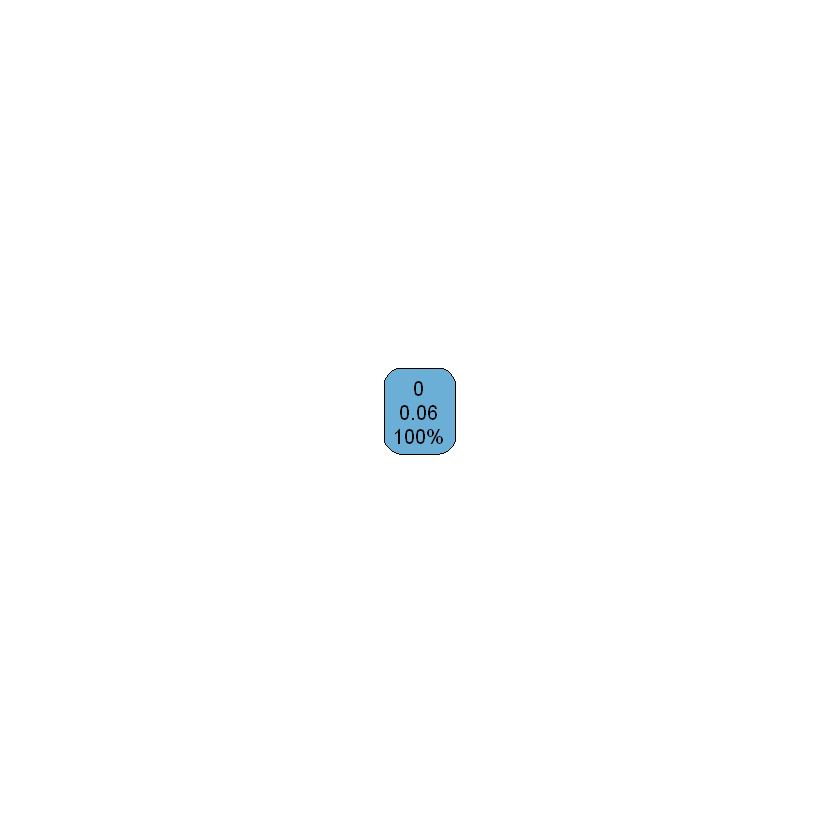

In [212]:
fit <- rpart(subscribe ~., data = train_data, method = 'class')
rpart.plot(fit, extra = 106)

In [213]:
predict_unseen <-predict(fit, test_data , type = 'class')

In [214]:
table_sub <- table(test_data$subscribe, predict_unseen)
table_sub

   predict_unseen
       0    1
  0 3297    0
  1  203    0

In [215]:
accuracy_Test <- sum(diag(table_sub)) / sum(table_sub)

In [216]:
print(paste('Accuracy for test', accuracy_Test))

[1] "Accuracy for test 0.942"


In [217]:
accuracy_tune <- function(fit) {
    predict_unseen <- predict(fit, test_data, type = 'class')
    table_sub <- table(test_data$subscribe, predict_unseen)
    accuracy_Test <- sum(diag(table_sub)) / sum(table_sub)
    accuracy_Test
}

In [218]:
control <- rpart.control(minsplit = 4,
    minbucket = round(5 / 3),
    maxdepth = 3,
    cp = 0)
tune_fit <- rpart(subscribe~., data = train_data, method = 'class', control = control)
accuracy_tune(tune_fit)

[1] 0.942

Naive Bayes

In [227]:
model <- naiveBayes(subscribe ~ ., data = train_data)
predict(model, train_data[1:10,-1])
predict(model, train_data[1:10,-1], type = "raw")

pred <- predict(model, test_data[,-1])
table(pred, test_data$subscribe)

[1] 0 0 0 0 0 0 0 0 0 0
Levels: 0 1

0,1
0.9675453,0.0324547119
0.9987968,0.0012031560
0.9994823,0.0005177376
0.9928047,0.0071952519
0.9998942,0.0001057717
0.8335908,0.1664091720
0.9987406,0.0012593973
0.9967478,0.0032521629
0.9992624,0.0007376172
0.9968082,0.0031917628


    
pred    0    1
   0 2949  115
   1  348   88

Linear Regression

In [231]:
model <- lm(subscribe ~ ., data = train_data)
model

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"


Call:
lm(formula = subscribe ~ ., data = train_data)

Coefficients:
                         (Intercept)                                  age4  
                           9.3214950                             0.0227218  
                                age1                                  age2  
                           0.0881367                             0.0019780  
                                job3                                  job6  
                          -0.0053315                             0.0055227  
                                job9                                  job4  
                           0.0008227                             0.0002922  
                                job7                                 job12  
                           0.0062142                             0.0183433  
                                job2                                  job8  
                          -0.0006432                             0.0286224  
       

In [232]:
predict(model, newdata = test_data)

Warning message in predict.lm(model, newdata = test_data):
"prediction from a rank-deficient fit may be misleading"

4         5         9        29        34        38        44        45 
1.0216327 1.0338803 1.0334830 1.0171847 1.0272997 1.0103328 1.1818523 1.0222934 
       54        55        59        68        83        87        91        95 
1.0090630 1.0224160 1.0236717 1.0239132 1.0085396 1.0019327 1.0790470 1.0243423 
       98       111       113       117       121       123       127       133 
1.0038333 1.1702579 0.9960417 1.0052912 1.0116097 1.0390985 1.0408297 1.0474794 
      134       136       140       144       156       167       168       170 
1.0174798 1.0133036 1.0101860 1.0257956 1.0211290 1.0057926 1.0251050 1.0316364 
      175       198       202       207       215       218       222       224 
1.0170045 1.0423715 1.0388878 1.0159710 1.4114205 1.0489007 1.0600799 1.2275856 
      226       229       233       239       241       245       253       255 
1.3996534 1.0400536 1.1134298 1.0143224 1.0106176 1.0238804 1.0317018 1.0378396 
      259       260       261       262       265       272       283       297 
1.0522138 1.0029306 1.0141219 0.9991286 1.1534568 1.0992533 1.0437682 1.0906002 
      300       302       303       305       306       308       326       336 
1.0324110 1.0200528 1.0185996 1.0281496 1.0256586 1.0291764 1.0317503 1.0157139 
      341       346       347       358       359       365       367       372 
1.0746608 1.0328964 1.0203091 1.0976684 1.0547898 1.0177134 1.0434265 1.0429483 
      375       377       379       382       386       388       392       399 
1.0228864 1.0289685 1.0283859 1.0330196 1.0224307 1.0261225 1.0187951 1.0181881 
      401       405       410       411       413       418       419       430 
1.0126995 1.0295038 1.0459776 1.0164011 1.0182271 1.1609631 1.0916362 1.0227569 
      441       442       445       451       452       459       462       464 
1.0291978 1.0258735 1.0304920 1.0408118 1.0216327 1.0252524 1.0367561 1.0094597 
      474       476       482       488       500       520       527       530 
1.0284895 1.0113237 1.0548936 1.0535925 1.2237113 1.0116710 1.0385832 1.1367975 
      533       534       548       555       558       561       575       578 
1.0142716 1.0055753 1.0329600 1.2315015 1.0657512 1.0202404 1.0161671 1.1996446 
      579       583       593       600       601       603       617       621 
1.2157142 1.0174892 1.0205772 1.0488071 0.9905066 1.0639428 1.0201818 1.0134646 
      626       628       631       632       634       649       653       656 
1.0370555 1.0141693 1.0442108 1.0315314 1.0040348 1.0310462 1.0259208 0.9855385 
      666       667       670       675       676       679       682       683 
1.0178164 1.2362371 1.0157827 0.9954597 1.0057850 1.0202784 1.0173017 1.0261060 
      691       692       693       699       702       707       710       714 
1.0373566 1.2037549 0.9958257 1.0262106 1.0346910 1.0396082 1.1975648 1.0172082 
      715       721       725       728       731       735       764       767 
1.0174271 1.0270529 1.0152335 1.0403458 1.0606425 1.0791036 1.0294143 1.1976922 
      768       769       770       781       785       798       804       812 
1.1458826 1.0360731 1.0308917 1.0264908 1.0361119 1.0596775 1.0078797 1.0292148 
      817       822       828       830       831       839       840       866 
1.0349374 1.2192878 1.0343615 1.0069899 1.0154005 1.0223231 1.0205191 1.0168206 
      877       878       883       887       890       899       908       924 
1.0129457 1.0521003 1.0229564 1.0100436 1.0219599 1.0027158 1.0389851 1.0320328 
      925       932       934       935       936       948       949       967 
1.4349954 1.0307293 1.0500645 1.0349677 1.1012405 1.1601402 1.2059790 1.0886832 
      977       980       989       993       999      1007      1010      1012 
1.0956088 1.1955518 1.0200864 1.0529818 1.2044719 1.0245213 1.1610937 1.0638657 
     1022      1031      1037      1045      1052      1057      1065      1071 
1.0402470 1.0285605 1.0193262 1.0236523

In [ ]:
#References
#references for random forests
#https://rpubs.com/kramea/simplerf

#https://www.analyticsvidhya.com/blog/2016/08/practicing-machine-learning-techniques-in-r-with-mlr-package/ - for decision tree, SVM 